# PaCMAP clustering
Notebook to plot clusters using PaCMAP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fungiclef.config import get_device

device = get_device()
device

'cuda'

In [3]:
import os
from pathlib import Path

# get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Mon May 12 07:12:46 EDT 2025


In [4]:
import pandas as pd

project_path = f"{root}/p-dsgt_clef2025-0/shared/fungiclef"
train_embed_path = f"{project_path}/data/embeddings/bert/train_text_embed.parquet"
val_embed_path = f"{project_path}/data/embeddings/bert/val_text_embed.parquet"
test_embed_path = f"{project_path}/data/embeddings/bert/test_text_embed.parquet"

train_parquet_path = f"{project_path}/data/dataset/processed/train_serialized.parquet"
val_parquet_path = f"{project_path}/data/dataset/processed/val_serialized.parquet"
test_parquet_path = f"{project_path}/data/dataset/processed/test_serialized.parquet"

train_embed_df = pd.read_parquet(train_embed_path)
train_df = pd.read_parquet(train_parquet_path)
val_embed_df = pd.read_parquet(val_embed_path)
val_df = pd.read_parquet(val_parquet_path)
test_emb_df = pd.read_parquet(test_embed_path)
test_df = pd.read_parquet(test_parquet_path)
display(train_embed_df.head())
display(train_df.head())

,filename,text,embeddings
0,0-3052832307.JPG,2021-01-24 2021 1.0 24.0 Mixed woodland (with ...,"[1.1637036, -0.16080582, 0.26960263, 0.9773083..."
1,0-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...,"[0.935365, -0.17268346, -0.18018651, 1.3108063..."
2,1-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...,"[0.9443524, -0.14294754, 0.022539457, 1.249039..."
3,2-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...,"[0.9325761, -0.18060221, 0.031541348, 1.204175..."
4,3-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...,"[0.9145981, -0.18528387, 0.111125745, 1.104633..."


,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,region,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion,data
0,2021-01-24,2021,1.0,24.0,Mixed woodland (with coniferous and deciduous ...,DK,Xylohypha ferruginosa (Corda) S.Hughes,Fungi,Ascomycota,Eurotiomycetes,...,Sjælland,Næstved,0-3052832307.JPG,2421,wood,0,0.0,16.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,0-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,1-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,2-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,3-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [12]:
train_df.describe()

,year,month,day,latitude,longitude,coorUncert,observationID,category_id,poisonous,elevation,landcover
count,7819.000000,7819.000000,7819.00000,7819.000000,7819.000000,7805.000000,7.819000e+03,7819.000000,7819.000000,7722.000000,7716.000000
mean,2017.179818,7.673104,15.75956,54.902924,11.655231,78.642152,2.712784e+09,1216.306561,0.007290,72.065754,11.714619
std,5.799599,2.904563,9.08400,8.023161,11.812552,771.469730,5.699759e+08,702.018977,0.085075,163.440745,5.251739
min,1863.000000,1.000000,1.00000,-41.467014,-125.136213,1.000000,2.237852e+09,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,6.000000,8.00000,55.504575,9.966628,10.000000,2.238483e+09,609.000000,0.000000,0.000000,8.000000
50%,2019.000000,8.000000,16.00000,55.826593,11.664595,25.000000,2.449444e+09,1228.000000,0.000000,14.000000,12.000000
75%,2020.000000,10.000000,24.00000,56.168667,12.338963,50.000000,3.080243e+09,1827.000000,0.000000,68.000000,17.000000
max,2021.000000,12.000000,31.00000,78.190238,147.193711,50000.000000,4.847353e+09,2426.000000,1.000000,1600.000000,17.000000


In [5]:
len(train_embed_df), len(train_df)

(7819, 7819)

In [6]:
import pacmap
import numpy as np
from sklearn.preprocessing import StandardScaler


def pacmap_embeddings(df: pd.DataFrame, col_name: str = "embeddings") -> np.ndarray:
    emb_df = np.stack(df[col_name].values)
    scaled_emb = StandardScaler().fit_transform(emb_df)

    # PaCMAP reduction
    reducer = pacmap.PaCMAP(n_components=2, random_state=42)
    embedding = reducer.fit_transform(
        scaled_emb
    )  # numpy array with shape (n_samples, 2)
    return embedding

In [7]:
# get cluster embeddings
train_embeddings = pacmap_embeddings(train_embed_df)

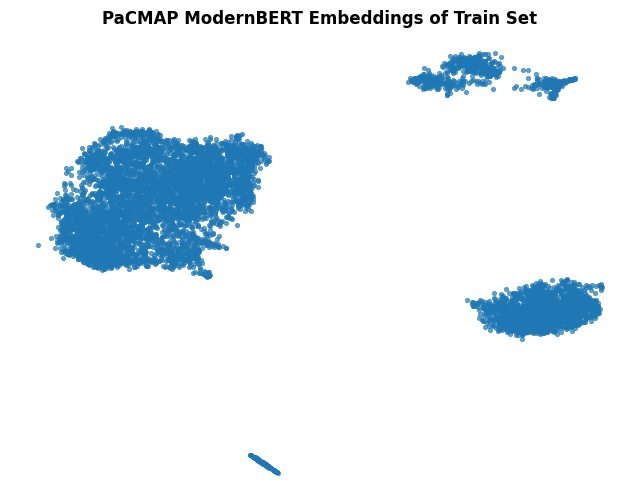

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    train_embeddings[:, 0], train_embeddings[:, 1], s=10, alpha=0.7, linewidths=0.5
)
plt.title("PaCMAP ModernBERT Embeddings of Train Set", weight="bold")
plt.axis("off")
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", size=14)  # Set default font size


def plot_pacmap_clusters(
    pandas_df: pd.DataFrame,
    cls_token: pd.DataFrame,
    col_name: str = "kingdom",
    top_n: int = 20,
    figsize: tuple = (10, 7),
    dpi: int = 120,
):
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    colors = plt.cm.tab10.colors  # Distinct color palette
    pandas_df = pandas_df.copy()

    # plot top-N frequency
    top_clusters = pandas_df[col_name].value_counts().nlargest(top_n).index
    plot_groups = [
        (cluster, pandas_df[col_name] == cluster, cluster) for cluster in top_clusters
    ]
    fig.suptitle(
        f"PaCMAP {col_name} projection, ModernBERT embeddings",
        fontsize=20,
        weight="bold",
    )

    # plot loop
    for i, (_, idx, label) in enumerate(plot_groups):
        ax.scatter(
            cls_token[idx, 0],
            cls_token[idx, 1],
            label=label,
            s=20,
            alpha=0.5,
            linewidth=0.5,
            color=colors[i % len(colors)],
        )
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.grid(color="blue", linestyle="--", linewidth=1, alpha=0.2)

    # remove axis spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    fig.tight_layout(pad=0.8)

    # add legend
    lgnd = ax.legend(
        ncol=3,
        loc="best",
        fontsize=12,
        shadow=True,
    )
    for handle in lgnd.legend_handles:
        handle.set_sizes([60.0])

    plt.show()

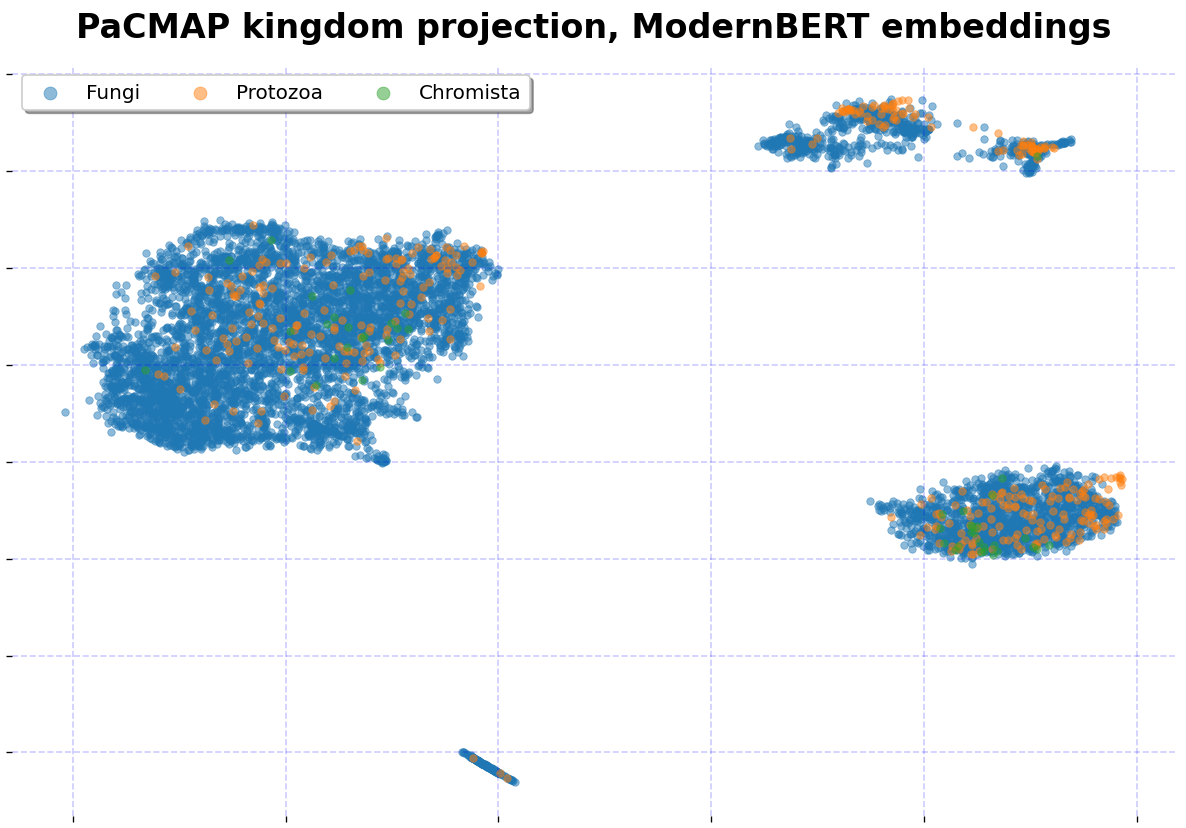

In [20]:
# plot PaCMAP clusters
plot_pacmap_clusters(
    train_df,
    train_embeddings,
    col_name="kingdom",
    figsize=(10, 7),
    dpi=120,
)

In [21]:
# count unique values in columns
def count_unique_values(df: pd.DataFrame, col_name: str) -> int:
    return df[col_name].nunique()


def count_unique_values_in_all_columns(df: pd.DataFrame) -> dict:
    unique_counts = {}
    for col in df.columns:
        unique_counts[col] = count_unique_values(df, col)
    return unique_counts


unique_counts = count_unique_values_in_all_columns(train_df)
unique_counts

{'eventDate': 2038,
 'year': 45,
 'month': 12,
 'day': 31,
 'habitat': 31,
 'countryCode': 26,
 'scientificName': 2427,
 'kingdom': 3,
 'phylum': 11,
 'class': 32,
 'order': 123,
 'family': 364,
 'genus': 1014,
 'specificEpithet': 2158,
 'hasCoordinate': 1,
 'species': 2413,
 'iucnRedListCategory': 5,
 'substrate': 30,
 'latitude': 3876,
 'longitude': 3897,
 'coorUncert': 72,
 'observationID': 4293,
 'region': 75,
 'district': 205,
 'filename': 7819,
 'category_id': 2427,
 'metaSubstrate': 9,
 'poisonous': 2,
 'elevation': 394,
 'landcover': 13,
 'biogeographicalRegion': 7,
 'data': 7819}

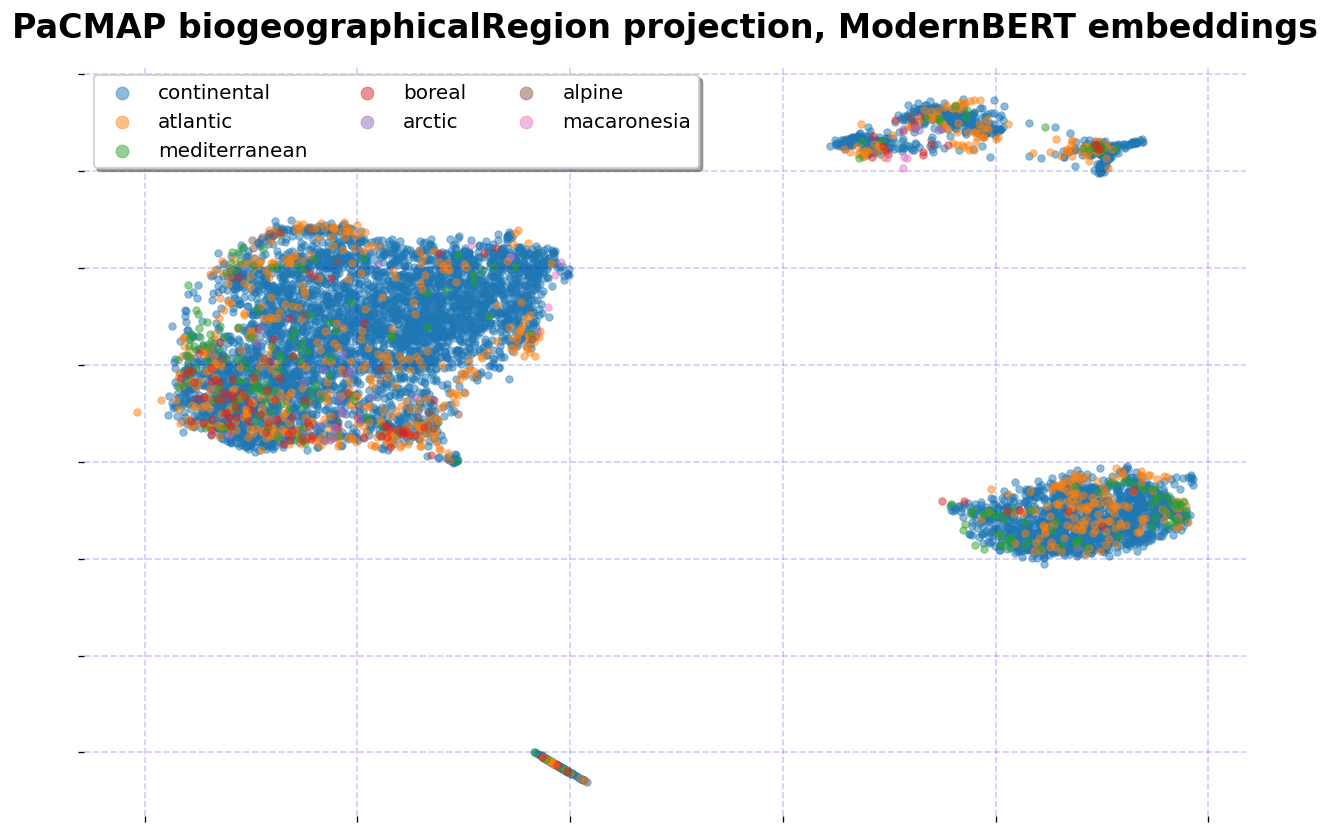

In [23]:
# plot PaCMAP clusters
plot_pacmap_clusters(
    train_df,
    train_embeddings,
    col_name="biogeographicalRegion",
    figsize=(10, 7),
    dpi=120,
)